In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

test.csv
train.csv



In [2]:
train_data=pd.read_csv('./input/train.csv')
test_data=pd.read_csv('./input/test.csv')
from sklearn.model_selection import train_test_split
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from skimage.feature import hog
train_data = train_data.values
features_train = train_data[:,1:]
labels_train = train_data[:,0]
print(features_train, labels_train)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]] [1 0 1 ..., 7 6 9]


In [4]:
list_hog = []
for features in features_train:
    fd = hog(features.reshape((28,28)), orientations=9, pixels_per_cell=(14,14), cells_per_block=(1,1), visualise=False)
    list_hog.append(fd)
hog_feat = np.array(list_hog, 'float64')


/home/thanoz/.conda/envs/pydata/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(hog_feat, labels_train, test_size=0.20, random_state=40)

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(),
    LinearSVC(),
    SVC(kernel='rbf',C=1),
    SVC(kernel='linear',C=1),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    DecisionTreeClassifier()
]
res_cols = ['Name','Accuracy']
result = pd.DataFrame(columns=res_cols)
for clf in classifiers:
    print("-"*50)
    name=clf.__class__.__name__
    print(name)
    clf.fit(X_train, Y_train)
    pred_train = clf.predict(X_test)
    acc = accuracy_score(Y_test, pred_train)
    print("Result ->", acc*100,'%')
    frame = pd.DataFrame([[name, acc*100]],columns=res_cols)
    result = result.append(frame)
print('-'*50)

--------------------------------------------------
KNeighborsClassifier
Result -> 91.3571428571 %
--------------------------------------------------
LinearSVC
Result -> 86.0357142857 %
--------------------------------------------------
SVC
Result -> 87.25 %
--------------------------------------------------
SVC
Result -> 88.7857142857 %
--------------------------------------------------
AdaBoostClassifier
Result -> 72.7023809524 %
--------------------------------------------------
RandomForestClassifier
Result -> 87.869047619 %
--------------------------------------------------
GaussianNB
Result -> 83.630952381 %
--------------------------------------------------
DecisionTreeClassifier
Result -> 76.8333333333 %
--------------------------------------------------


In [7]:
type(test_data)

pandas.core.frame.DataFrame

In [11]:
list_test_hog = []
test_data = test_data.values
for feat in test_data:
    fd = hog(feat.reshape(28,28), orientations=9, pixels_per_cell=(14,14), cells_per_block=(1,1),visualise=False)
    list_test_hog.append(fd)
hog_test_feat = np.array(list_test_hog)
clf = KNeighborsClassifier()
clf.fit(hog_feat, labels_train)
pred = clf.predict(hog_test_feat)
pred


/home/thanoz/.conda/envs/pydata/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


array([2, 0, 8, ..., 3, 9, 2])

In [ ]:
pred.shape
a = np.array([i for i in range(1,42000)])
import csv
with open('Submission.csv', 'w') as f:
    wrtr = csv.writer(f,delimiter=',')
    cols=['ImageId','Label']
    wrtr.writerow(cols)
    t = 1
    for i in pred:
        ro = [t,i]
        wrtr.writerow(ro)
        t+=1
    f.close()

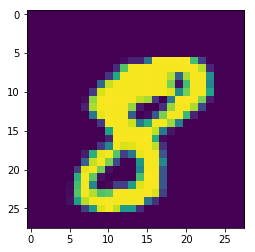

In [27]:
# Visualisations 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

temp = features_train[10]
temp=temp.reshape(28,28)
plt.imshow(temp, cmap=None, interpolation='nearest')
plt.show()